In [1]:
import tensorflow as tf
import keras
import numpy as np
import os
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
import seaborn as sns

import scipy.stats as sc_stats

import random

from sklearn.model_selection import train_test_split


from mpl_toolkits.mplot3d import Axes3D


Using TensorFlow backend.


In [2]:
# parameters
time_steps = 1
inputs = 5
outputs = 2

In [3]:
dir_list = os.listdir("/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/appdata/")
dir_path ="/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/appdata/"

subj_files_list =[]; ## list of subject_files fullfilling a criteria

dir_files = [i for i in os.listdir(dir_path) if i.startswith('sub')]

for subj_file_path in dir_files:

    file_path  ="/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/appdata/"+ subj_file_path
    mypath =file_path
    
    play_names = [i for i in os.listdir(mypath) if os.path.isfile(os.path.join(mypath,i)) and i.startswith('app')]   
    
    if len(play_names) >= 50: ## criteria
        subj_files_list.append(subj_file_path)
        


In [4]:
all_subj_metrics_df = pd.DataFrame(); all_subj_metrics_manual_df = pd.DataFrame()
neurons=8
dir_list = os.listdir("/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/appdata/")
dir_path ="/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/appdata/"

dir_files = [i for i in os.listdir(dir_path) if i.startswith('sub')]


# for num, subj_file_path in enumerate(dir_files):
for num, subj_file_path in enumerate(subj_files_list):
    
    
    file_path  ="/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/appdata/"+ subj_file_path
    print(num)

    file_path = file_path + "/OddEvenPlays"

    
    subj_num = subj_file_path


    file_name = file_path + "/LSTM_updated_Crossval_currprev_opts_metricsneurons=8.csv"
    
    
    
    
    
    all_subj_metrics_manual_df = all_subj_metrics_manual_df.append(pd.read_csv(file_path+"/metric_manual.csv"))
    
    
    
    
    
    
#     metric_out_df.to_csv(file_path+"LSTM_updated_CrossvalTESTinsess2ndhalf_currprev_opts_metrics_neurons="+str(neurons)+".csv")

    all_subj_metrics_df = all_subj_metrics_df.append(pd.read_csv(file_name))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


In [5]:
all_subj_metrics_df["pseudoR2"] = 1+all_subj_metrics_df.loss/(np.log(0.5))

all_subj_metrics_df["pseudoR2_test"] = 1+all_subj_metrics_df.loss_test/(np.log(0.5))
                                                                        
all_subj_metrics_df["pseudoR2_valid"] = 1 + all_subj_metrics_df.loss_val/(np.log(0.5))

In [6]:
all_subj_metrics_df8=all_subj_metrics_df
all_subj_metrics_manual_df8 = all_subj_metrics_manual_df

In [ ]:
# all_subj_metrics_df8.to_csv(dir_path+"Summaries/curr_prev_opts_all_subj_metrics_df8_testsess.csv") ## current options, prev actions, prev outcome, prev opts
# all_subj_metrics_manual_df8.to_csv(dir_path+"Summaries/curr_prev_opts_all_subj_metrics_manual_df8_testsess.csv") ## current options, prev actions, prev outcome, prev opts

all_subj_metrics_df8.to_csv(dir_path+"Summaries/OddEvenPlays/curr_prev_opts_all_subj_metrics_df8_testsess.csv") ## current options, prev actions, prev outcome, prev opts
all_subj_metrics_manual_df8.to_csv(dir_path+"Summaries/OddEvenPlays/curr_prev_opts_all_subj_metrics_manual_df8_testsess.csv") ## current options, prev actions, prev outcome, prev opts



## PROSPECT THEORY

In [7]:
PT_file_path ="/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/appdata/"
# PT_file_name = PT_file_path + "PT_loss_updated_combined_1sthalf.csv"
# PT_file_name = PT_file_path + "/Summaries/PT_loss_updated_50_split_combined_1sthalf.csv"
PT_file_name = PT_file_path + "/Summaries/OddEvenPlays/PT_loss_updated_50_split_combined_1sthalf.csv"


PT_metrics = pd.read_csv(PT_file_name)
PT_metrics = PT_metrics[PT_metrics.PT_loss !=0]
PT_metrics

,Subject_number,PT_loss,PT_pseudoR2,PT_accuracy,PT_loss_test,PT_pseudoR2_test,PT_accuracy_test
1,2,398.069234,0.266549,0.667834,187.788970,0.283275,0.675537
37,38,555.617978,0.210259,0.621982,278.319925,0.180549,0.620281
64,65,2076.774182,0.256722,0.650616,1039.172235,0.229595,0.642122
80,81,319.486636,0.388698,0.714408,154.200410,0.388835,0.708433
89,90,429.325749,0.311028,0.689959,216.606804,0.255958,0.670251
118,119,433.529412,0.170490,0.606492,204.800969,0.155813,0.601360
131,132,538.752603,0.075796,0.550382,271.572020,0.034986,0.540034
133,134,555.011558,0.079641,0.551850,251.667996,0.105714,0.559932
157,158,401.545049,0.334130,0.691054,201.365445,0.308312,0.699435
171,172,421.142225,0.383793,0.723077,199.987581,0.393863,0.726841


## PROSPECT THEORY vs RNN

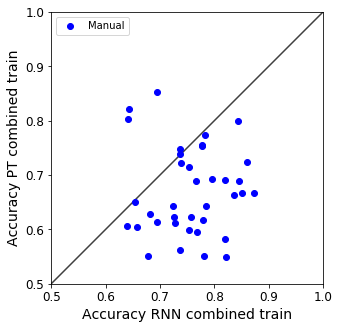

In [9]:
fig,ax= plt.subplots(figsize=(5,5))
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Accuracy RNN combined train',Fontsize=14);
ax.set_ylabel('Accuracy PT combined train'  ,Fontsize=14);

ax.set_xlim([0.5,1])
ax.set_ylim([0.5,1]);


# plt.scatter(all_subj_metrics_df8.accuracy,PT_metrics.PT_accuracy,label ="Post pre-train Acc(train)", color="red")

# plt.scatter(all_subj_metrics_df8.accuracy,PT_metrics.PT_accuracy,label ="Tensorflow", color="green")

# plt.scatter(all_subj_metrics_df8.loc[all_subj_metrics_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].accuracy_test,PT_metrics.loc[all_subj_metrics_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].PT_accuracy_test,label =">5%", color="grey")

plt.scatter(all_subj_metrics_manual_df8.accuracy_train,PT_metrics.PT_accuracy,label ="Manual", color="blue")


# plt.scatter(all_subj_metrics_manual_df8.loc[all_subj_metrics_manual_df8.accuracy_train.values>PT_metrics.PT_accuracy_train.values+0.05].accuracy_train,PT_metrics.loc[all_subj_metrics_manual_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].PT_accuracy_test,label =">5%", color="grey")


plt.legend(loc=0);
# plt.savefig(dir_path+"Summaries/OddEvenPlays" +"/Accuracy_train_RNN_PT.pdf")

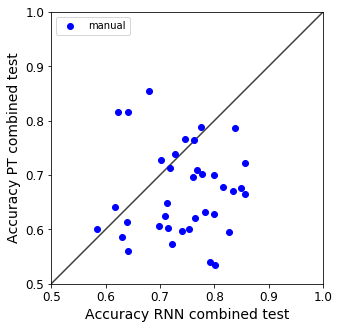

In [11]:
fig,ax= plt.subplots(figsize=(5,5))
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Accuracy RNN combined test',Fontsize=14);
ax.set_ylabel('Accuracy PT combined test'  ,Fontsize=14);

ax.set_xlim([0.5,1])
ax.set_ylim([0.5,1]);


# plt.scatter(all_subj_metrics_df8.accuracy,PT_metrics.PT_accuracy,label ="Post pre-train Acc(train)", color="red")

# plt.scatter(all_subj_metrics_df8.accuracy_test,PT_metrics.PT_accuracy_test,label ="Tensorflow", color="green")

plt.scatter(all_subj_metrics_manual_df8.accuracy_test,PT_metrics.PT_accuracy_test,label ="manual", color="blue")


# plt.scatter(all_subj_metrics_df8.loc[all_subj_metrics_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].accuracy_test,PT_metrics.loc[all_subj_metrics_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].PT_accuracy_test,label =">5%", color="grey")

# plt.scatter(all_subj_metrics_manual_df8.accuracy_test,PT_metrics.PT_accuracy_test,label ="Manual", color="blue")


# plt.scatter(all_subj_metrics_manual_df8.loc[all_subj_metrics_manual_df8.accuracy_train.values>PT_metrics.PT_accuracy_train.values+0.05].accuracy_train,PT_metrics.loc[all_subj_metrics_manual_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].PT_accuracy_test,label =">5%", color="grey")


plt.legend(loc=0);
# plt.savefig(dir_path+"Summaries/OddEvenPlays"+"/Accuracy_test_RNN_PT.pdf")

In [15]:
sc_stats.wilcoxon(all_subj_metrics_manual_df8.accuracy_test,PT_metrics.PT_accuracy_test)

WilcoxonResult(statistic=131.0, pvalue=0.0008793581480408838)

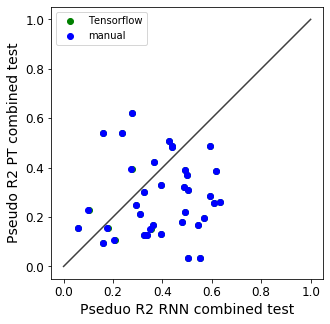

In [12]:
fig,ax= plt.subplots(figsize=(5,5))
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Pseduo R2 RNN combined test',Fontsize=14);
ax.set_ylabel('Pseudo R2 PT combined test'  ,Fontsize=14);

# ax.set_xlim([0.5,1])
# ax.set_ylim([0.5,1]);



plt.scatter(all_subj_metrics_df8.pseudoR2_test,PT_metrics.PT_pseudoR2_test,label ="Tensorflow", color="green")

plt.scatter(all_subj_metrics_manual_df8.pseudo_R2_test,PT_metrics.PT_pseudoR2_test,label ="manual", color="blue")


plt.legend(loc=0);
# plt.savefig(dir_path+"Summaries/OddEvenPlays"+"/PseduoR2_test_RNN_PT.pdf")

In [14]:
sc_stats.wilcoxon(all_subj_metrics_manual_df8.pseudo_R2_test,PT_metrics.PT_pseudoR2_test)

WilcoxonResult(statistic=159.0, pvalue=0.00368298733170533)